Loading data...
Run Y = pca(X, no_dims) to perform PCA on your dataset.


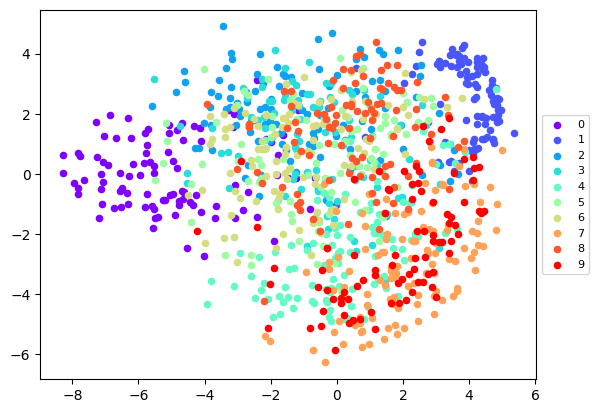

Run Z = tsne(X, no_dims, perplexity) to perform t-SNE on your dataset.


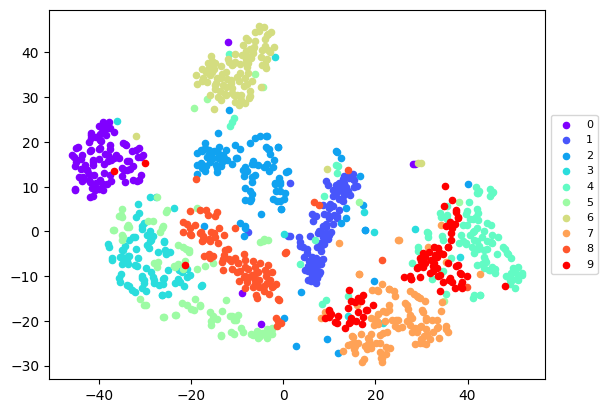

In [ ]:
import matplotlib
#matplotlib.use('Agg') plt.show() 못쓰는 단점 비대화형 백엔드설정

import numpy as np
import pylab as Plot
import matplotlib.cm as cm
import sklearn.preprocessing

#import tsne :// 파이썬 3.7이하에서만 구동가능
from sklearn.manifold import TSNE  # scikit-learn t-SNE 사용
from sklearn.decomposition import PCA

def sample_data(n_samples):
	X = np.loadtxt("data/mnist2500_X.txt");
	labels = np.loadtxt("data/mnist2500_labels.txt");
    
    # 데이터를 랜덤 샘플링 합니다.
	np.random.seed(0)
	sample_idx = np.random.choice(list(range(2500)), n_samples, replace=False)
	sampled_labels = labels[sample_idx]
	sampled_X = X[sample_idx]
	return sampled_X, sampled_labels

def tsne(X, no_dims, perplexity):
    # scikit-learn의 TSNE 실행
    model = TSNE(n_components=no_dims, perplexity=perplexity, random_state=42)
    Z = model.fit_transform(X)
    return Z

def pca(X, no_dims):
	scaler = sklearn.preprocessing.MinMaxScaler()
	X_scaled = scaler.fit_transform(np.array(X).astype('float64'))
	mu = np.mean(X_scaled, axis=0)
	X_scaled -= mu

	model = PCA(n_components=no_dims)
	Y = model.fit_transform(X_scaled)
	return Y

def main():
	# 데이터를 불러옵니다.
	print("Loading data...")
	X, labels = sample_data(1000)

	# PCA를 실행합니다.
	print("Run Y = pca(X, no_dims) to perform PCA on your dataset.")
	Y = pca(X, 2)
    
	# PCA의 결과를 시각화합니다.
	legend_ = []; colors = cm.rainbow(np.linspace(0, 1, 10))
	for i in sorted(list(set(labels))):
		idxs = (labels==i).nonzero()
		l = Plot.scatter(np.squeeze(Y[idxs,0]), Y[idxs,1], 20, color=colors[int(i)])
		legend_.append(l)
	Plot.legend(legend_, list(range(10)), loc='center left', ncol=1, fontsize=8, bbox_to_anchor=(1, 0.5))	
	Plot.show()

    
     # t-SNE.py 파일을 불러와 t-SNE를 실행합니다.
	print("Run Z = tsne(X, no_dims, perplexity) to perform t-SNE on your dataset.")
	Z = tsne(X, 2, perplexity=30.0)    

    # t-SNE의 결과를 시각화합니다.
	legend2_ = []; colors2 = cm.rainbow(np.linspace(0, 1, 10))
	for i in sorted(list(set(labels))):
		idxs = (labels==i).nonzero()
		l2 = Plot.scatter(np.squeeze(Z[idxs,0]), Z[idxs,1], 20, color=colors2[int(i)])
		legend2_.append(l2)
	Plot.legend(legend2_, list(range(10)), loc='center left', ncol=1, fontsize=8, bbox_to_anchor=(1, 0.5))
	Plot.show()

	
if __name__ == "__main__":
	main()